<a href="https://colab.research.google.com/github/an1khusain/anik/blob/main/Fake_News_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
news = pd.read_csv('news_1.csv')
news.head()

,Unnamed: 0,title,text,label
0,0,A whirlwind day in D.C. showcases Trump’s unor...,Donald Trump endorsed an unabashedly noninterv...,REAL
1,1,"In Baltimore's call for federal police probe, ...",While some Justice Department investigations a...,REAL
2,2,Trump Proudly Declares: Most Of The People I’v...,Trump Proudly Declares: Most Of The People I’v...,FAKE
3,3,Inside the Trump-Bush melodrama: Decades of te...,Donald Trump spent a day in January 2014 hobno...,REAL
4,4,Shutdown clash to return in force by December,Notable names include Ray Washburne (Commerce)...,REAL


In [3]:
news['label_num'] = news['label'].map({'FAKE': 0, 'REAL': 1})
news.head()

,Unnamed: 0,title,text,label,label_num
0,0,A whirlwind day in D.C. showcases Trump’s unor...,Donald Trump endorsed an unabashedly noninterv...,REAL,1
1,1,"In Baltimore's call for federal police probe, ...",While some Justice Department investigations a...,REAL,1
2,2,Trump Proudly Declares: Most Of The People I’v...,Trump Proudly Declares: Most Of The People I’v...,FAKE,0
3,3,Inside the Trump-Bush melodrama: Decades of te...,Donald Trump spent a day in January 2014 hobno...,REAL,1
4,4,Shutdown clash to return in force by December,Notable names include Ray Washburne (Commerce)...,REAL,1


In [4]:
news = news.drop(['label', 'title', 'Unnamed: 0'], axis=1)
news.head()

,text,label_num
0,Donald Trump endorsed an unabashedly noninterv...,1
1,While some Justice Department investigations a...,1
2,Trump Proudly Declares: Most Of The People I’v...,0
3,Donald Trump spent a day in January 2014 hobno...,1
4,Notable names include Ray Washburne (Commerce)...,1


In [5]:
news.sample(frac=1)

,text,label_num
4467,Is Trump the lesser of two evils or are both c...,0
1582,Let’s Be Clear – A Vote For Warmonger Hillary ...,0
560,GRAPHIC | A breakdown of what candidates talke...,1
366,Lawmakers may have let President Barack Obama'...,1
3827,"Naming Trump, Nigel Farage in Britain and Mari...",0
...,...,...
5527,There’s a conceit that says everything at Face...,1
3772,"""We've got an opening on the court. I think Sa...",1
4594,"Over the last few weeks, the news for Scott Wa...",1
3774,Marco Rubio's uneven debate performance Saturd...,1


In [6]:
news.reset_index(drop=True)

,text,label_num
0,Donald Trump endorsed an unabashedly noninterv...,1
1,While some Justice Department investigations a...,1
2,Trump Proudly Declares: Most Of The People I’v...,0
3,Donald Trump spent a day in January 2014 hobno...,1
4,Notable names include Ray Washburne (Commerce)...,1
...,...,...
6330,Obama To Limit Police Acquisition Of Some Mili...,1
6331,BNI Store Oct 29 2016 EU using taxpayer money ...,0
6332,Next Story → Judge Judy LOSES IT on Hood Rat: ...,0
6333,America’s Streets Will Run With Blood- Mike Ad...,0


In [7]:
news.head()

,text,label_num
0,Donald Trump endorsed an unabashedly noninterv...,1
1,While some Justice Department investigations a...,1
2,Trump Proudly Declares: Most Of The People I’v...,0
3,Donald Trump spent a day in January 2014 hobno...,1
4,Notable names include Ray Washburne (Commerce)...,1


In [8]:
import re

def clean_text(text):
  text = text.lower()



    # Remove URLs
  text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

    # Remove HTML tags
  text = re.sub(r'<.*?>', '', text)

    # Remove punctuation
  text = re.sub(r'[^\w\s]', '', text)

    # Remove digits
  text = re.sub(r'\d+', '', text)

    # Remove newline characters
  text = re.sub(r'\n', ' ', text)

    # Remove extra whitespace
  text = re.sub(r'\s+', ' ', text).strip()

  return text




In [9]:
news['text'] = news['text'].apply(clean_text)

In [10]:
news['text']

,text
0,donald trump endorsed an unabashedly noninterv...
1,while some justice department investigations a...
2,trump proudly declares most of the people ive ...
3,donald trump spent a day in january hobnobbing...
4,notable names include ray washburne commerce a...
...,...
6330,obama to limit police acquisition of some mili...
6331,bni store oct eu using taxpayer money to give ...
6332,next story judge judy loses it on hood rat you...
6333,americas streets will run with blood mike adam...


In [11]:
x = news['text']
y = news['label_num']

In [12]:
x

,text
0,donald trump endorsed an unabashedly noninterv...
1,while some justice department investigations a...
2,trump proudly declares most of the people ive ...
3,donald trump spent a day in january hobnobbing...
4,notable names include ray washburne commerce a...
...,...
6330,obama to limit police acquisition of some mili...
6331,bni store oct eu using taxpayer money to give ...
6332,next story judge judy loses it on hood rat you...
6333,americas streets will run with blood mike adam...


In [13]:
y

,label_num
0,1
1,1
2,0
3,1
4,1
...,...
6330,1
6331,0
6332,0
6333,0


In [37]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 7)

In [38]:
x_train.shape

(5068,)

In [39]:
x_test.shape

(1267,)

In [40]:
from sklearn.feature_extraction.text import TfidfVectorizer


In [41]:
vectorization = TfidfVectorizer()

In [42]:
xv_train = vectorization.fit_transform(x_train)

In [43]:
xv_test = vectorization.transform(x_test)

In [44]:
xv_train

<5068x73495 sparse matrix of type '<class 'numpy.float64'>'
	with 1699079 stored elements in Compressed Sparse Row format>

In [45]:
xv_test

<1267x73495 sparse matrix of type '<class 'numpy.float64'>'
	with 425198 stored elements in Compressed Sparse Row format>

In [46]:
from sklearn.linear_model import LogisticRegression

In [47]:
from sklearn.metrics import classification_report

In [48]:
LR = LogisticRegression()

In [49]:
LR.fit(xv_train, y_train)

LogisticRegression()

In [50]:
y_pred = LR.predict(xv_test)

In [51]:
LR.score(xv_test, y_test)

0.920284135753749

In [36]:
from sklearn.model_selection import cross_val_score

lR = LogisticRegression()
cross_val_score(lR, xv_train, y_train, cv=10, scoring='accuracy')

array([0.90729783, 0.89151874, 0.90138067, 0.9112426 , 0.92899408,
       0.90729783, 0.89940828, 0.93096647, 0.92885375, 0.91699605])

In [29]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92       627
           1       0.94      0.88      0.91       640

    accuracy                           0.91      1267
   macro avg       0.92      0.91      0.91      1267
weighted avg       0.92      0.91      0.91      1267



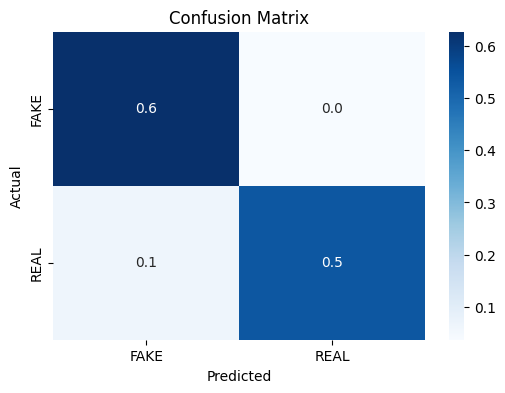

In [52]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred, labels=[0, 1])
cm_percentage = cm / 1000


# Plot confusion matrix using seaborn heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm_percentage, annot=True, fmt='.1f', cmap='Blues', xticklabels=['FAKE', 'REAL'], yticklabels=['FAKE', 'REAL'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

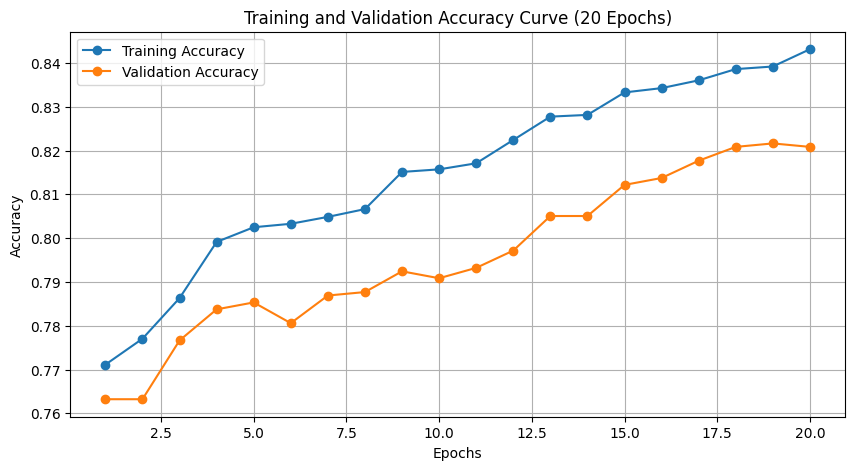

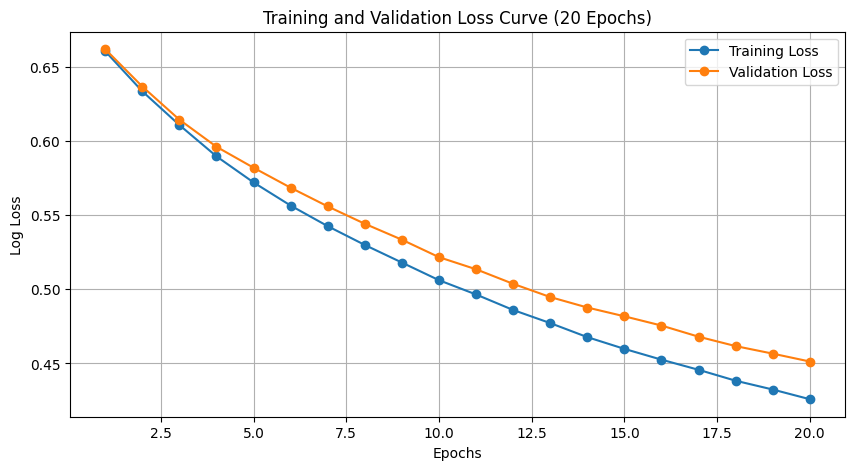

In [53]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, log_loss


# Initialize Gradient Boosting Classifier
model = GradientBoostingClassifier(n_estimators=1, warm_start=True, random_state=42)

# Lists to store metrics for each epoch
train_accuracies = []
val_accuracies = []
train_losses = []
val_losses = []

# Train the model over 20 epochs
for epoch in range(1, 21):
    model.n_estimators = epoch  # Increment the number of estimators
    model.fit(xv_train, y_train)  # Train the model

    # Predict probabilities for calculating log loss
    train_preds = model.predict_proba(xv_train)
    val_preds = model.predict_proba(xv_test)

    # Predict classes for accuracy calculation
    train_class_preds = model.predict(xv_train)
    val_class_preds = model.predict(xv_test)

    # Calculate metrics
    train_accuracy = accuracy_score(y_train, train_class_preds)
    val_accuracy = accuracy_score(y_test, val_class_preds)
    train_loss = log_loss(y_train, train_preds)
    val_loss = log_loss(y_test, val_preds)

    # Append metrics to lists
    train_accuracies.append(train_accuracy)
    val_accuracies.append(val_accuracy)
    train_losses.append(train_loss)
    val_losses.append(val_loss)

# Plot Training and Validation Accuracy
plt.figure(figsize=(10, 5))
plt.plot(range(1, 21), train_accuracies, label='Training Accuracy', marker='o')
plt.plot(range(1, 21), val_accuracies, label='Validation Accuracy', marker='o')
plt.title('Training and Validation Accuracy Curve (20 Epochs)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

# Plot Training and Validation Loss
plt.figure(figsize=(10, 5))
plt.plot(range(1, 21), train_losses, label='Training Loss', marker='o')
plt.plot(range(1, 21), val_losses, label='Validation Loss', marker='o')
plt.title('Training and Validation Loss Curve (20 Epochs)')
plt.xlabel('Epochs')
plt.ylabel('Log Loss')
plt.legend()
plt.grid()
plt.show()


In [ ]:
def manual_testing(news):
    # Transform the input news article using the TF-IDF vectorizer
    news_vector = vectorization.transform([news])
    # Predict using the loaded model
    prediction = LR.predict(news_vector)
    # Display result based on prediction
    result = "Fake News" if prediction[0] == 0 else "Real News"
    return f'"It is a - {result}"'

# Example usage
news_article = input("Enter your news article text here: ")
print(manual_testing(news_article))

Enter your news article text here: Donald Trump endorsed an unabashedly noninterventionist approach to world affairs Monday during a day-long tour of Washington, casting doubt on the need for the North Atlantic Treaty Organization and expressing skepticism about a muscular U.S. military presence in Asia.  The foreign policy positions — outlined in a meeting with the editorial board of The Washington Post — came on a day when Trump set aside the guerrilla tactics and showman bravado that have powered his campaign to appear as a would-be presidential nominee, explaining his policies, accepting counsel and building bridges to Republican elites.  On Monday night, Trump delivered a scripted address in front of the American Israel Public Affairs Committee, prompting ovations with pledges to stand by Israel and take a hard line on peace talks with the Palestinians.  Trump’s whirlwind day of appearances around the nation’s capital was intended in part to head off an establishment push to deny 

In [54]:
from sklearn.tree import DecisionTreeClassifier

In [55]:
dtc = DecisionTreeClassifier()

In [56]:
dtc.fit(xv_train, y_train)

DecisionTreeClassifier()

In [57]:
pred_dtc = dtc.predict(xv_test)

In [58]:
dtc.score(xv_test, y_test)

0.8153117600631413

In [59]:
from sklearn.model_selection import cross_val_score

dtc = DecisionTreeClassifier()
cross_val_score(dtc, xv_train, y_train, cv=10, scoring='accuracy')

array([0.80276134, 0.81459566, 0.82051282, 0.78698225, 0.80670611,
       0.79487179, 0.7790927 , 0.79092702, 0.7944664 , 0.7826087 ])

In [60]:
print(classification_report(y_test, pred_dtc))

              precision    recall  f1-score   support

           0       0.84      0.80      0.82       664
           1       0.79      0.83      0.81       603

    accuracy                           0.82      1267
   macro avg       0.82      0.82      0.82      1267
weighted avg       0.82      0.82      0.82      1267



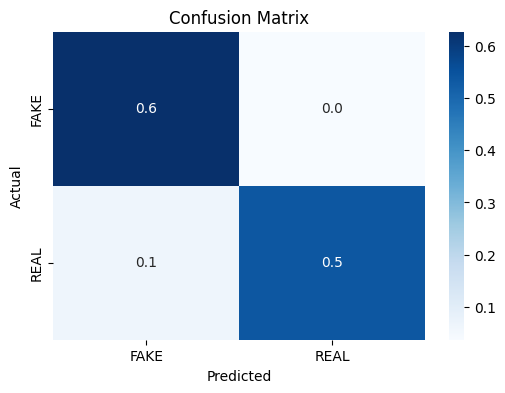

In [61]:
cm = confusion_matrix(y_test, y_pred, labels=[0, 1])
cm_percentage = cm / 1000


# Plot confusion matrix using seaborn heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm_percentage, annot=True, fmt='.1f', cmap='Blues', xticklabels=['FAKE', 'REAL'], yticklabels=['FAKE', 'REAL'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
def manual_testing(news):
    # Transform the input news article using the TF-IDF vectorizer
    news_vector = vectorization.transform([news])
    # Predict using the loaded model
    prediction = dtc.predict(news_vector)
    # Display result based on prediction
    result = "Fake News" if prediction[0] == 0 else "Real News"
    return f'"It is a - {result}"'

# Example usage
news_article = input("Enter your news article text here: ")
print(manual_testing(news_article))

Enter your news article text here: Donald Trump endorsed an unabashedly noninterventionist approach to world affairs Monday during a day-long tour of Washington, casting doubt on the need for the North Atlantic Treaty Organization and expressing skepticism about a muscular U.S. military presence in Asia.  The foreign policy positions — outlined in a meeting with the editorial board of The Washington Post — came on a day when Trump set aside the guerrilla tactics and showman bravado that have powered his campaign to appear as a would-be presidential nominee, explaining his policies, accepting counsel and building bridges to Republican elites.  On Monday night, Trump delivered a scripted address in front of the American Israel Public Affairs Committee, prompting ovations with pledges to stand by Israel and take a hard line on peace talks with the Palestinians.  Trump’s whirlwind day of appearances around the nation’s capital was intended in part to head off an establishment push to deny 

In [62]:
news = pd.read_csv('news_2.csv')
news.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [63]:
news['label_num'] = news['label'].map({'FAKE': 0, 'REAL': 1})
news.head()

,Unnamed: 0,title,text,label,label_num
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE,0
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,0
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL,1
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE,0
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL,1


In [64]:
news = news.drop(['title', 'Unnamed: 0', 'label'], axis=1)
news.head()

,text,label_num
0,"Daniel Greenfield, a Shillman Journalism Fello...",0
1,Google Pinterest Digg Linkedin Reddit Stumbleu...,0
2,U.S. Secretary of State John F. Kerry said Mon...,1
3,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",0
4,It's primary day in New York and front-runners...,1


In [65]:
import spacy

nlp = spacy.load('en_core_web_sm')

In [66]:
news['vector'] = news['text'].apply(lambda text: nlp(text).vector)
news.head()

,text,label_num,vector
0,"Daniel Greenfield, a Shillman Journalism Fello...",0,"[0.014034989, -0.17436738, -0.09153082, 0.0777..."
1,Google Pinterest Digg Linkedin Reddit Stumbleu...,0,"[0.068100914, -0.21701623, -0.04571801, -0.054..."
2,U.S. Secretary of State John F. Kerry said Mon...,1,"[0.0086862, -0.23759705, -0.111274965, -0.0174..."
3,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",0,"[0.0030229934, -0.250446, -0.16494465, 0.01926..."
4,It's primary day in New York and front-runners...,1,"[-0.069283396, -0.26675084, -0.05245658, 0.044..."


In [102]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    news.vector.values,
    news.label_num,
    test_size=0.2)

In [103]:
x_train_2D = np.vstack(x_train)
x_test_2D = np.vstack(x_test)

In [104]:
x_train

array([array([-2.70554312e-02, -1.37590915e-01,  7.38208837e-05, -4.31074426e-02,
               1.57263149e-02,  1.44161135e-01,  2.11164072e-01,  1.29340753e-01,
               2.01168001e-01,  2.36069649e-01, -2.61916080e-04,  9.99063998e-02,
              -3.22553843e-01,  7.13572502e-02, -1.43505380e-01, -1.61197737e-01,
              -7.73118436e-02,  1.20201640e-01,  1.01048246e-01,  4.35169321e-03,
              -1.83847472e-01,  1.45720556e-01,  1.66100189e-02, -2.61173338e-01,
               2.71653272e-02, -2.54216678e-02,  4.10587639e-01,  1.98439002e-01,
               1.87816978e-01,  1.19846016e-01,  5.72422668e-02, -1.75949454e-01,
               4.22551572e-01, -3.82452421e-02, -4.22443487e-02, -1.21305130e-01,
               5.83595037e-02, -3.08801364e-02, -1.17790848e-01, -7.10299760e-02,
              -9.87070575e-02,  1.75259367e-01,  1.85345002e-02, -2.37251706e-02,
               3.88319641e-02, -2.29564924e-02,  4.15898450e-02,  2.26039127e-01,
               2

In [105]:
x_train_2D

array([[-2.70554312e-02, -1.37590915e-01,  7.38208837e-05, ...,
         2.34272763e-01, -1.76809058e-01,  1.59148157e-01],
       [-6.53669238e-02, -3.68555307e-01, -7.89080933e-02, ...,
         1.84511140e-01, -1.75079495e-01,  1.47873223e-01],
       [-1.68588653e-01, -2.15800509e-01, -8.44650120e-02, ...,
         1.52781174e-01, -8.65422636e-02,  1.16835199e-01],
       ...,
       [ 1.29567292e-02, -2.13808104e-01, -4.60296273e-02, ...,
         2.64743268e-01, -1.84564307e-01,  1.09070845e-01],
       [ 9.48545337e-02, -2.11417764e-01, -1.09559022e-01, ...,
         2.86756784e-01, -1.68931872e-01, -1.73468273e-02],
       [-2.53759008e-02, -2.73295760e-01,  3.21456306e-02, ...,
         1.90273568e-01, -1.62206516e-01,  1.37451947e-01]], dtype=float32)

In [106]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

xe_train = scaler.fit_transform(x_train_2D)
xe_test = scaler.transform(x_test_2D)


In [107]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

MNB = MultinomialNB()
MNB.fit(xe_train, y_train)

MultinomialNB()

In [108]:
predic_mnb = MNB.predict(xe_test)

In [109]:
MNB.score(xe_test, y_test)

0.7032359905288083

In [110]:
from sklearn.model_selection import cross_val_score

cross_val_score(MNB, xe_train, y_train, cv=10, scoring='accuracy')

array([0.69033531, 0.71794872, 0.71794872, 0.71005917, 0.69033531,
       0.69625247, 0.67455621, 0.75345168, 0.70948617, 0.69960474])

In [76]:
print(classification_report(y_test, predic_mnb))

              precision    recall  f1-score   support

           0       0.89      0.33      0.48       653
           1       0.57      0.95      0.72       614

    accuracy                           0.63      1267
   macro avg       0.73      0.64      0.60      1267
weighted avg       0.73      0.63      0.60      1267



In [77]:
from sklearn.ensemble import RandomForestClassifier

RFC = RandomForestClassifier()
RFC.fit(xe_train, y_train)

RandomForestClassifier()

In [78]:
y_pred_rfc = RFC.predict(xe_test)

In [79]:
RFC.score(xe_test, y_test)

0.8689818468823993

In [80]:
from sklearn.model_selection import cross_val_score

cross_val_score(RFC, xe_train, y_train, cv=10, scoring='accuracy')

array([0.85601578, 0.85404339, 0.83629191, 0.84220907, 0.86587771,
       0.86587771, 0.84023669, 0.84418146, 0.86956522, 0.85573123])

In [81]:
print(classification_report(y_test, y_pred_rfc))

              precision    recall  f1-score   support

           0       0.85      0.90      0.88       653
           1       0.89      0.84      0.86       614

    accuracy                           0.87      1267
   macro avg       0.87      0.87      0.87      1267
weighted avg       0.87      0.87      0.87      1267



In [82]:
from sklearn.svm import SVC

SVC = SVC()
SVC.fit(xe_train, y_train)

SVC()

In [83]:
y_pred_svc = SVC.predict(xe_test)

In [84]:
SVC.score(xe_test, y_test)

0.909234411996843

In [85]:
from sklearn.model_selection import cross_val_score

cross_val_score(SVC, xe_train, y_train, cv=10, scoring='accuracy')

array([0.8974359 , 0.90729783, 0.8816568 , 0.88560158, 0.90532544,
       0.8974359 , 0.86982249, 0.87771203, 0.91106719, 0.87549407])

In [86]:
print(classification_report(y_test, y_pred_svc))

              precision    recall  f1-score   support

           0       0.93      0.89      0.91       653
           1       0.89      0.93      0.91       614

    accuracy                           0.91      1267
   macro avg       0.91      0.91      0.91      1267
weighted avg       0.91      0.91      0.91      1267



In [87]:
from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier()
KNN.fit(xe_train, y_train)

KNeighborsClassifier()

In [88]:
y_pred = KNN.predict(xe_test)

In [89]:
KNN.score(xe_test, y_test)

0.760852407261247

In [90]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.60      0.72       653
           1       0.69      0.93      0.79       614

    accuracy                           0.76      1267
   macro avg       0.79      0.77      0.76      1267
weighted avg       0.80      0.76      0.76      1267



In [91]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()
LR.fit(xe_train, y_train)

LogisticRegression()

In [92]:
y_pred_lr = LR.predict(xe_test)

In [93]:
LR.score(xe_test, y_test)

0.8958168902920284

In [95]:
from sklearn.model_selection import cross_val_score

cross_val_score(LR, xe_test, y_test, cv=10, scoring='accuracy')

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

array([0.81102362, 0.87401575, 0.8503937 , 0.85826772, 0.86614173,
       0.8503937 , 0.83464567, 0.80952381, 0.9047619 , 0.9047619 ])

In [96]:
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.93      0.86      0.89       653
           1       0.86      0.94      0.90       614

    accuracy                           0.90      1267
   macro avg       0.90      0.90      0.90      1267
weighted avg       0.90      0.90      0.90      1267



In [111]:
from sklearn.ensemble import GradientBoostingClassifier
GBC = GradientBoostingClassifier()
GBC.fit(xe_train, y_train)
y_pred_gbc = GBC.predict(xe_test)
GBC.score(xe_test, y_test)

0.8721389108129439

In [112]:
from sklearn.model_selection import cross_val_score

cross_val_score(LR, xe_test, y_test, cv=10, scoring='accuracy')

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

array([0.76377953, 0.82677165, 0.84251969, 0.81102362, 0.85826772,
       0.78740157, 0.85826772, 0.84126984, 0.77777778, 0.81746032])

In [113]:
print(classification_report(y_test, y_pred_gbc))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87       620
           1       0.88      0.87      0.87       647

    accuracy                           0.87      1267
   macro avg       0.87      0.87      0.87      1267
weighted avg       0.87      0.87      0.87      1267

